In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Regrerssion_energy_production_data (2).csv to Copy of Regrerssion_energy_production_data (2).csv


In [ ]:
# Reading the data by mentionig the seperator ';' as the csv file used ; as spererator instead of ','
EPdata = pd.read_csv('Copy of Regrerssion_energy_production_data (2).csv', sep = ';')
EPdata.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [ ]:
# checking the initial shape of data
EPdata.shape

(9568, 5)

In [ ]:
# Basic exploration of data
EPdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# descriptive statistics of the data
EPdata.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

# Data Preprocessing

In [ ]:
# Checking for null values
EPdata.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
# Checking for duplicates
EPdata.duplicated().sum()

41

In [ ]:
# removing duplicates rows
EPdata = EPdata.drop_duplicates()
EPdata.shape

(9527, 5)

In [ ]:
EPdata.skew()

temperature         -0.136107
exhaust_vacuum       0.196819
amb_pressure         0.273846
r_humidity          -0.435138
energy_production    0.305791
dtype: float64

In [ ]:
EPdata.kurtosis()

temperature         -1.032694
exhaust_vacuum      -1.443758
amb_pressure         0.104170
r_humidity          -0.440515
energy_production   -1.045392
dtype: float64

In [ ]:
def calculate_outlier_percentage(column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    # Calculate percentage
    percentage_outliers = (len(outliers) / len(column)) * 100
    return percentage_outliers

# Calculate percentage of outliers for each column
for col in EPdata.columns:
    outlier_percentage = calculate_outlier_percentage(EPdata[col])
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

Percentage of outliers in temperature: 0.00%
Percentage of outliers in exhaust_vacuum: 0.00%
Percentage of outliers in amb_pressure: 0.96%
Percentage of outliers in r_humidity: 0.14%
Percentage of outliers in energy_production: 0.00%


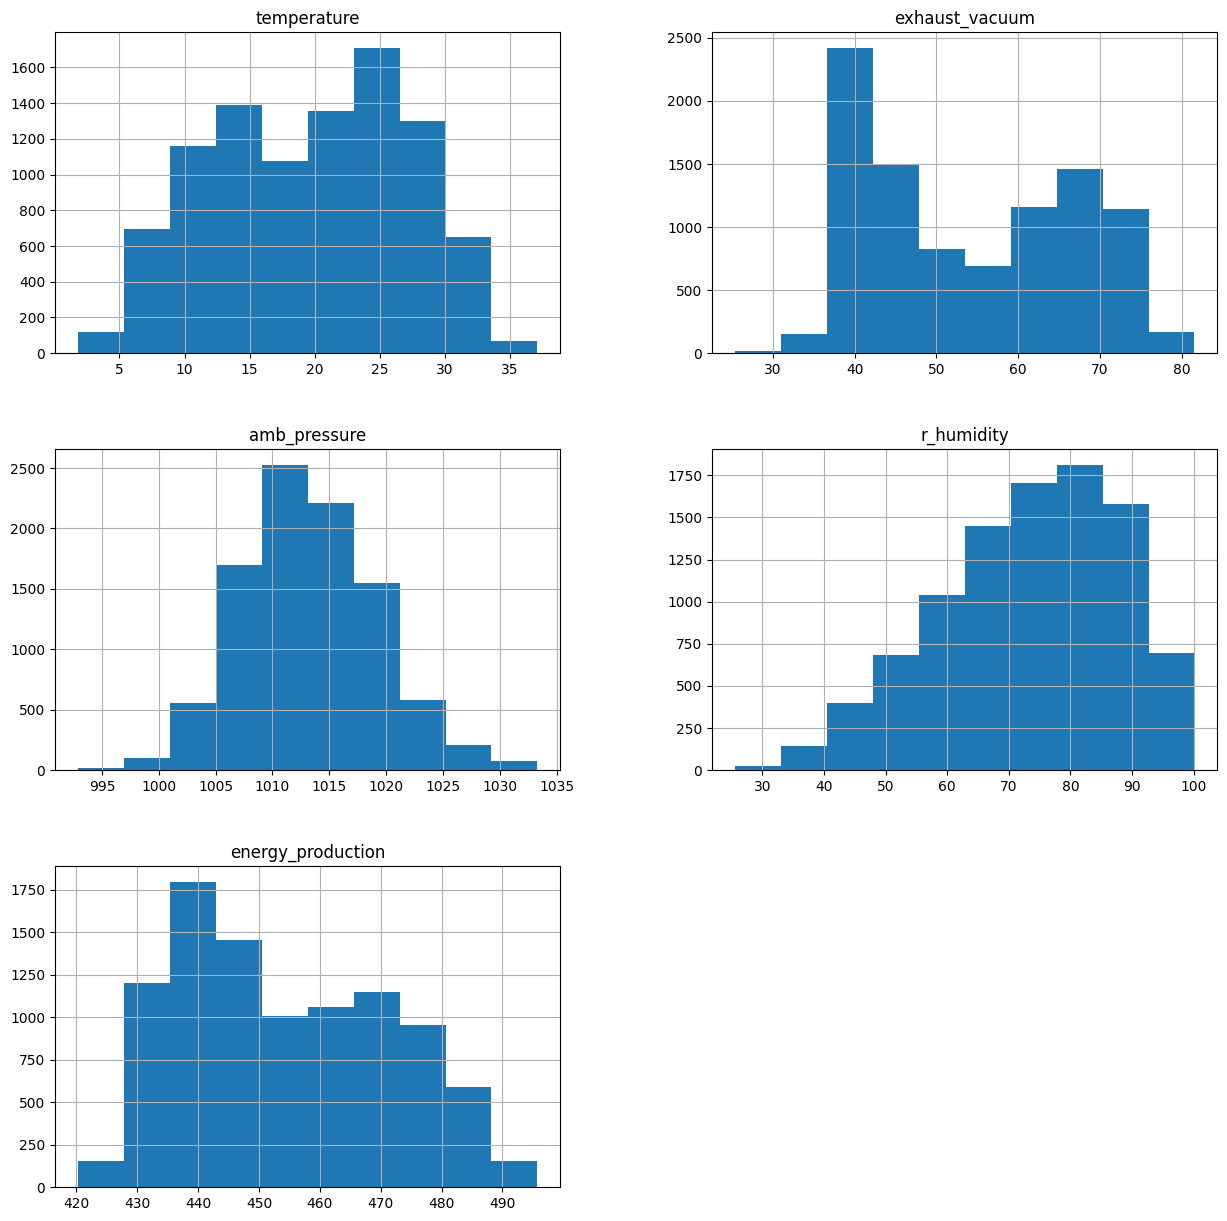

In [ ]:
# Visualizing the data
EPdata.hist(figsize=(15,15))
plt.show()

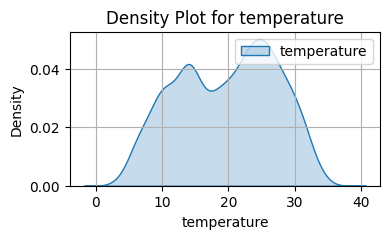

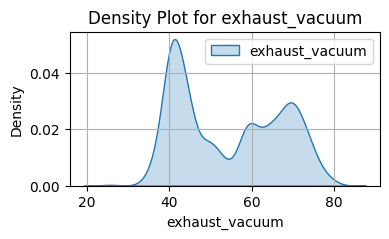

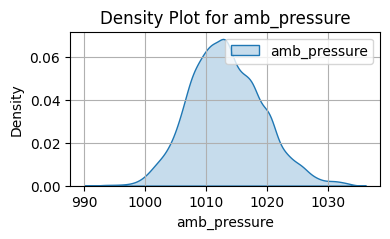

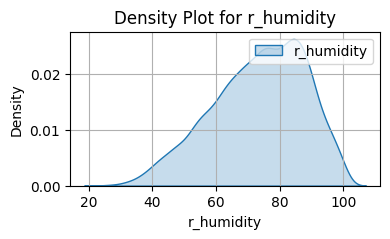

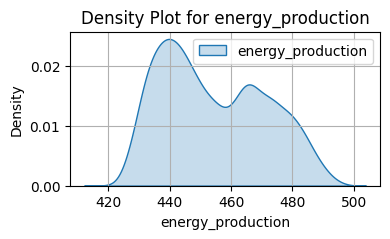

In [ ]:
#univariate density plot

import seaborn as sns
import matplotlib.pyplot as plt

for col in EPdata.columns:
    plt.figure(figsize=(4, 2))  # Set a new figure for each variable

    # Check if the column data type is float or int
    if pd.api.types.is_numeric_dtype(EPdata[col]):
        sns.kdeplot(EPdata[col], label=col, fill=True)  # Create density plot with filling
        plt.xlabel(col)  # Set x-axis label
        plt.ylabel('Density')  # Set y-axis label
        plt.title(f'Density Plot for {col}')  # Set title
        plt.legend()  # Show legend
        plt.grid(True)  # Enable grid
        plt.show()  # Show plot for each variable

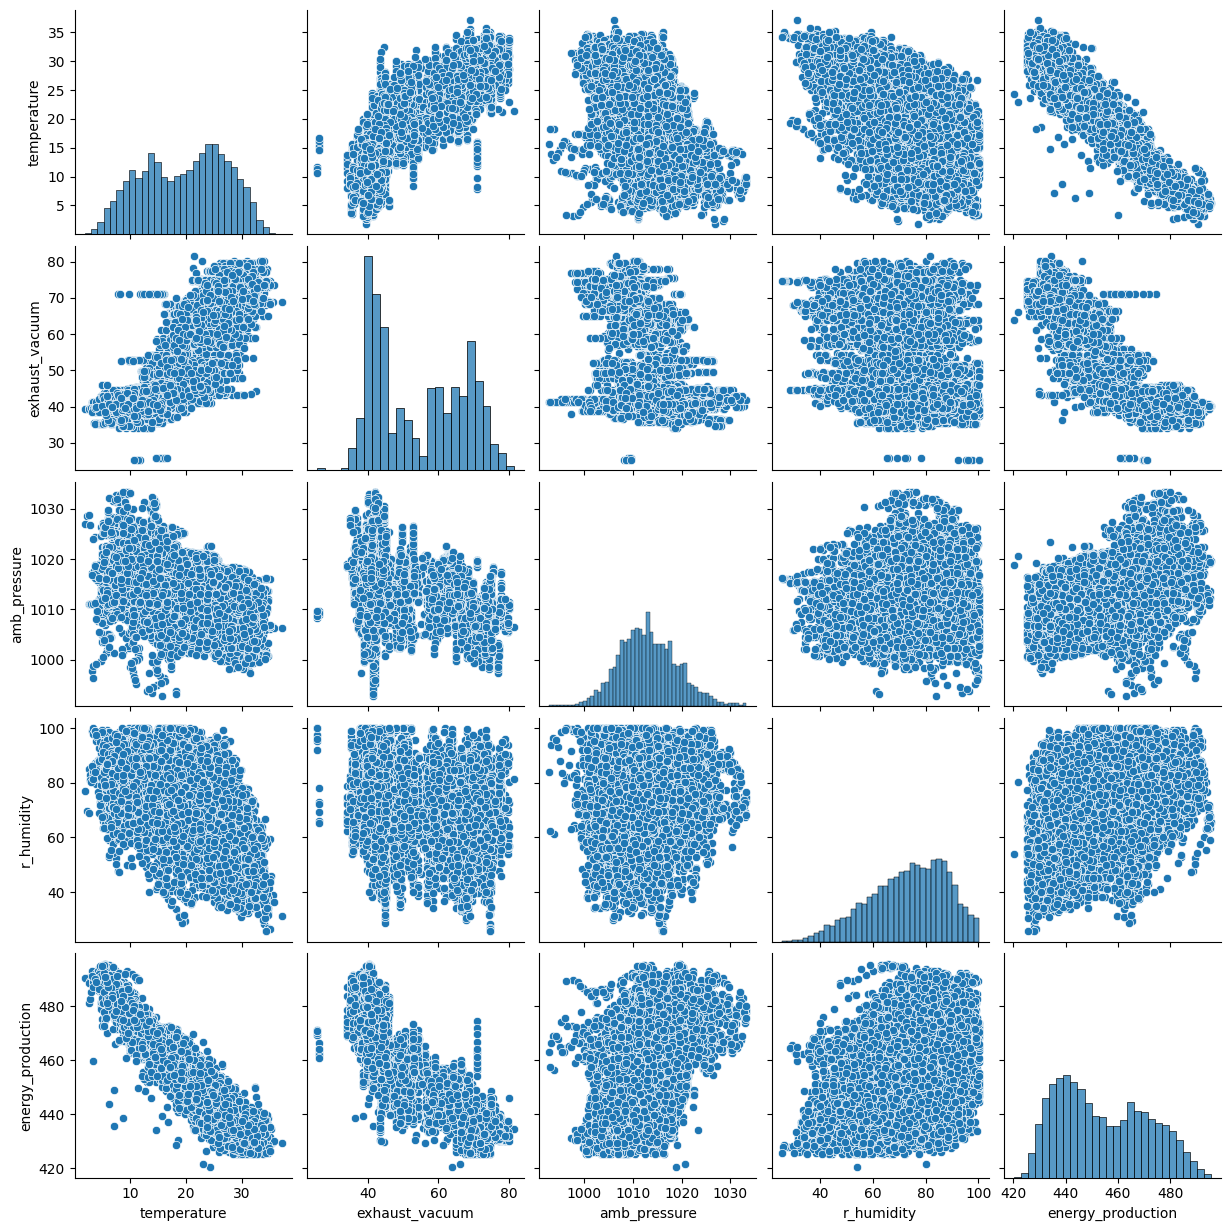

In [ ]:
sns.pairplot(EPdata)

<Axes: >

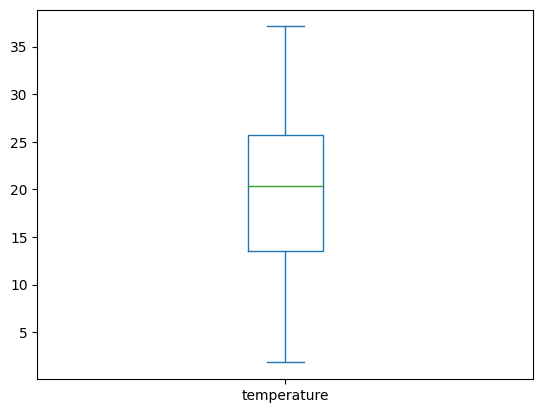

In [ ]:
# Boxplot
EPdata["temperature"].plot(kind="box")

<Axes: >

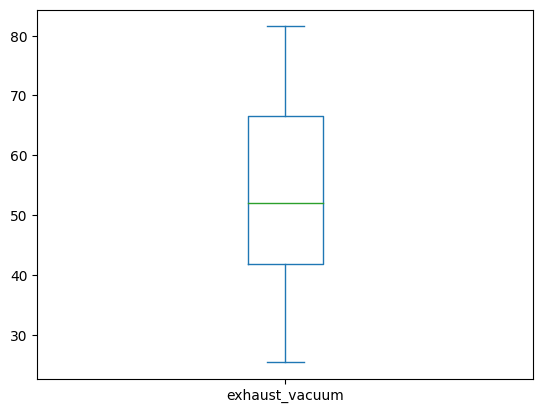

In [ ]:
# Boxplot
EPdata["exhaust_vacuum"].plot(kind="box")

<Axes: >

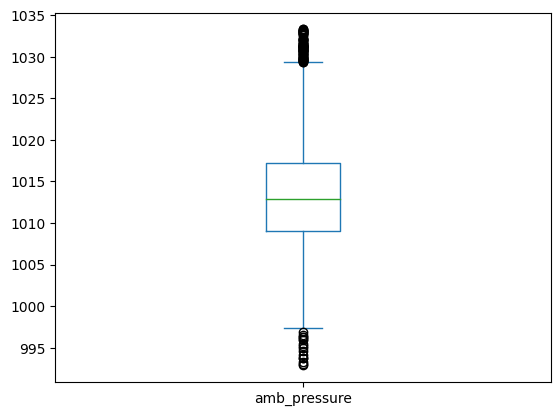

In [ ]:
EPdata["amb_pressure"].plot(kind="box")

<Axes: >

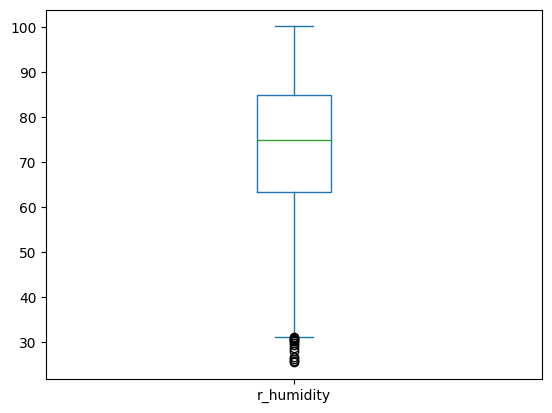

In [ ]:
EPdata["r_humidity"].plot(kind="box")

<Axes: >

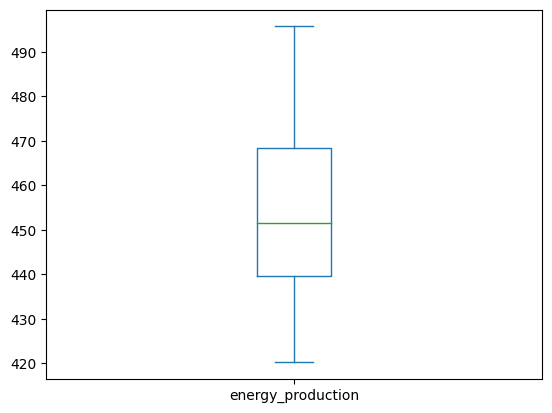

In [ ]:
EPdata["energy_production"].plot(kind="box")

In [ ]:
# Identify outliers using IQR
Q1 = EPdata.quantile(0.25)
Q3 = EPdata.quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = (EPdata < (lower_bound)) | (EPdata > (upper_bound))
outliers_IQR.sum()

temperature           0
exhaust_vacuum        0
amb_pressure         91
r_humidity           13
energy_production     0
dtype: int64

In [ ]:
# outliers using z-score
# using stats-zscore
from scipy import stats
z_scores = np.abs(stats.zscore(EPdata))
outliers_zscore = (z_scores > 3)
outliers_zscore.sum(axis=0)

temperature           0
exhaust_vacuum        0
amb_pressure         51
r_humidity            7
energy_production     0
dtype: int64

In [ ]:
# outliers using z-score for temperature, exhaust_vacuum, amb_pressure, and energy_production as they follow nearly normal distribution
from scipy import stats
z_scores = np.abs(stats.zscore(EPdata[["temperature", "exhaust_vacuum", "amb_pressure", "energy_production"]]))
outliers_zscore = (z_scores > 3)
outliers_zscore.sum(axis=0)

temperature           0
exhaust_vacuum        0
amb_pressure         51
energy_production     0
dtype: int64

In [ ]:
# Identify outliers using IQR for r_humidity as it follows slightly skewed distribution
Q1 = EPdata[["r_humidity"]].quantile(0.25)
Q3 = EPdata[["r_humidity"]].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = (EPdata[["r_humidity"]] < (lower_bound)) | (EPdata[["r_humidity"]] > (upper_bound))
outliers_IQR.sum()

r_humidity    13
dtype: int64

In [ ]:
# Treating outlier by trimming
# copy the original data
data_outlierstrimmed = EPdata.copy()

# z-score method for 'temperature', 'exhaust_vacuum', 'amb_pressure', and 'energy_production'
z_scores = np.abs(stats.zscore(data_outlierstrimmed[["temperature", "exhaust_vacuum", "amb_pressure", "energy_production"]]))
# Filter rows where z-score is less than or equal to 3
data_outlierstrimmed = data_outlierstrimmed[(z_scores <= 3).all(axis=1)]

# Reset index after z-score trimming to avoid index mismatch
data_outlierstrimmed.reset_index(drop=True, inplace=True)

# IQR method for 'r_humidity'
Q1 = data_outlierstrimmed[["r_humidity"]].quantile(0.25)
Q3 = data_outlierstrimmed[["r_humidity"]].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR).item()  # Convert to scalar value using .item()
upper_bound = (Q3 + 1.5 * IQR).item()  # Convert to scalar value using .item()

# Filter out outliers based on IQR for 'r_humidity'
# data_trimmed = data_trimmed[(data_trimmed["r_humidity"] >= lower_bound.iloc[0]) & (data_trimmed["r_humidity"] <= upper_bound.iloc[0])]
data_outlierstrimmed = data_outlierstrimmed[(data_outlierstrimmed["r_humidity"] >= lower_bound) & (data_outlierstrimmed["r_humidity"] <= upper_bound)]

data_outlierstrimmed.shape

(9464, 5)

In [ ]:
# Rechecking for outliers
z_scores = np.abs(stats.zscore(data_outlierstrimmed[["temperature", "exhaust_vacuum", "amb_pressure", "energy_production"]]))
outliers_zscore = (z_scores > 3)
outliers_zscore.sum(axis=0)

temperature           0
exhaust_vacuum        0
amb_pressure         12
energy_production     0
dtype: int64

In [ ]:
# Rechecking for outliers
Q1 = data_outlierstrimmed[["r_humidity"]].quantile(0.25)
Q3 = data_outlierstrimmed[["r_humidity"]].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = (data_outlierstrimmed[["r_humidity"]] < (lower_bound)) | (data_outlierstrimmed[["r_humidity"]] > (upper_bound))
outliers_IQR.sum()

r_humidity    0
dtype: int64

<Axes: >

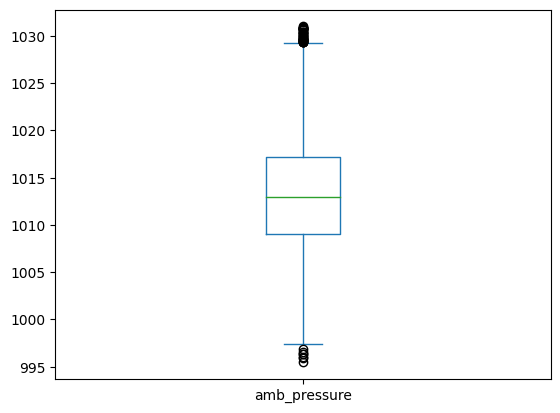

In [ ]:
data_outlierstrimmed["amb_pressure"].plot(kind="box")

In [ ]:
# treating outliers by replacing them with mean and median
data_outliersreplaced = EPdata.copy()
z_scores = np.abs(stats.zscore(data_outliersreplaced["amb_pressure"]))
# z_scores = stats.zscore(data_outlierreplaced["amb_pressure"])
mean_value = data_outliersreplaced["amb_pressure"].mean()
data_outliersreplaced["amb_pressure"] = np.where(np.abs(z_scores) > 3, mean_value, data_outliersreplaced["amb_pressure"])

data_outliersreplaced["r_humidity"] = np.where(data_outliersreplaced["r_humidity"] > upper_bound["r_humidity"], data_outliersreplaced["r_humidity"].median(), data_outliersreplaced["r_humidity"])
data_outliersreplaced["r_humidity"] = np.where(data_outliersreplaced["r_humidity"] < lower_bound["r_humidity"], data_outliersreplaced["r_humidity"].median(), data_outliersreplaced["r_humidity"])

data_outliersreplaced.shape

(9527, 5)

In [ ]:
# Rechecking for outliers
z_scores = np.abs(stats.zscore(data_outliersreplaced[["temperature", "exhaust_vacuum", "amb_pressure", "energy_production"]]))
outliers_zscore = (z_scores > 3)
outliers_zscore.sum(axis=0)

temperature           0
exhaust_vacuum        0
amb_pressure         12
energy_production     0
dtype: int64

In [ ]:
# Rechecking for outliers
Q1 = data_outliersreplaced[["r_humidity"]].quantile(0.25)
Q3 = data_outliersreplaced[["r_humidity"]].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = (data_outliersreplaced[["r_humidity"]] < (lower_bound)) | (data_outliersreplaced[["r_humidity"]] > (upper_bound))
outliers_IQR.sum()

r_humidity    2
dtype: int64

In [ ]:
EPdata.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9527.000000     9527.000000   9527.000000  9527.000000   
mean     19.658225       54.293421   1013.237084    73.334951   
std       7.444397       12.686309      5.940526    14.607513   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.530000       41.740000   1009.085000    63.375000   
50%      20.350000       52.080000   1012.920000    75.000000   
75%      25.710000       66.510000   1017.200000    84.850000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count         9527.00000  
mean           454.33591  
std             17.03908  
min            420.26000  
25%            439.75000  
50%            451.52000  
75%            468.36500  
max            495.76000

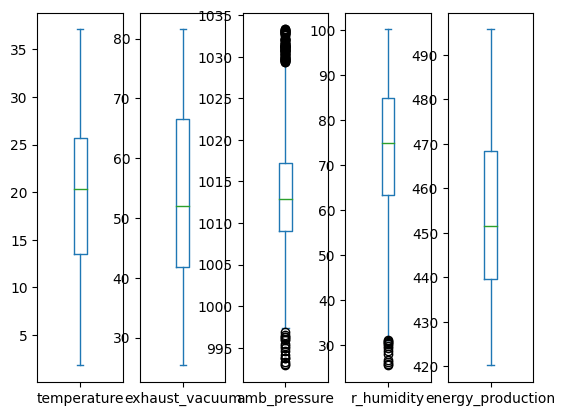

In [ ]:
EPdata.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

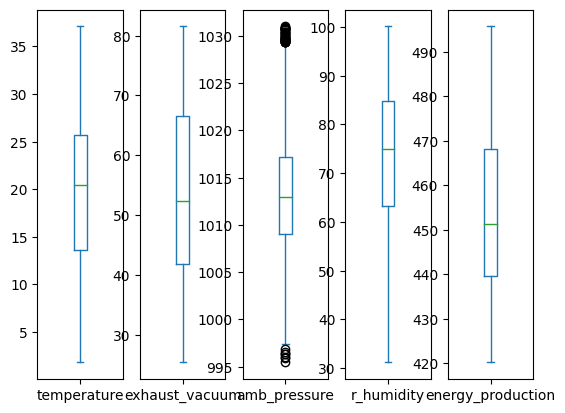

In [ ]:
data_outlierstrimmed.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

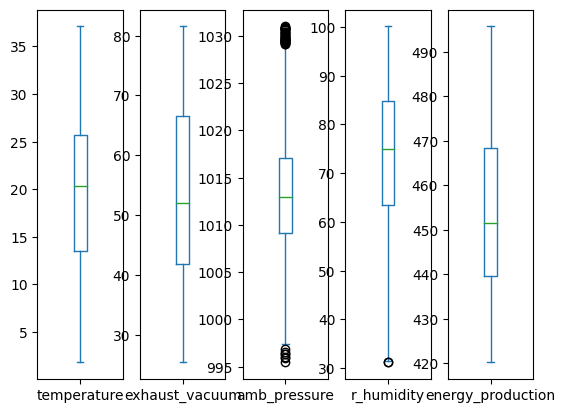

In [ ]:
data_outliersreplaced.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

In [ ]:
EPdata.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.508222   -0.543947   
exhaust_vacuum        0.843689        1.000000     -0.415718   -0.312214   
amb_pressure         -0.508222       -0.415718      1.000000    0.101631   
r_humidity           -0.543947       -0.312214      0.101631    1.000000   
energy_production    -0.947908       -0.869900      0.518687    0.391175   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.518687  
r_humidity                  0.391175  
energy_production           1.000000

In [ ]:
data_outliersreplaced.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.505196   -0.542091   
exhaust_vacuum        0.843689        1.000000     -0.416071   -0.311201   
amb_pressure         -0.505196       -0.416071      1.000000    0.106752   
r_humidity           -0.542091       -0.311201      0.106752    1.000000   
energy_production    -0.947908       -0.869900      0.516848    0.390033   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.516848  
r_humidity                  0.390033  
energy_production           1.000000

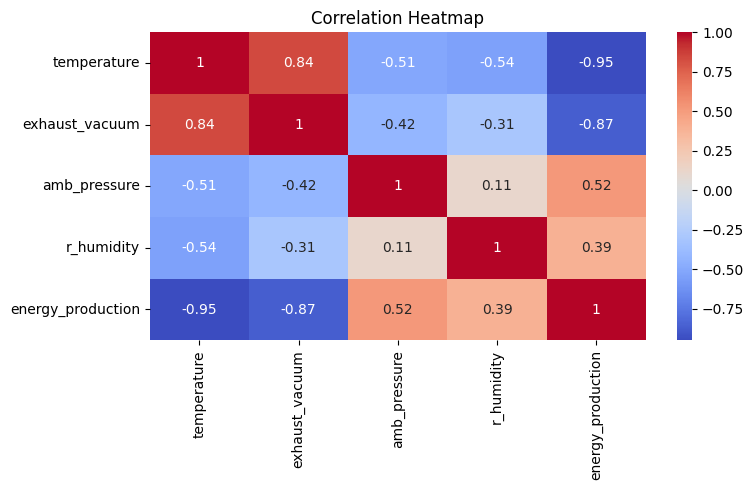

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(round(data_outliersreplaced.corr(),2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='temperature', ylabel='exhaust_vacuum'>

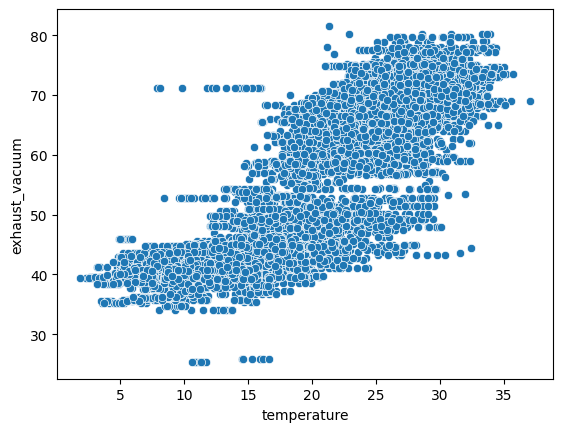

In [ ]:
sns.scatterplot(x='temperature', y='exhaust_vacuum', data=data_outliersreplaced)

<Axes: xlabel='temperature', ylabel='exhaust_vacuum'>

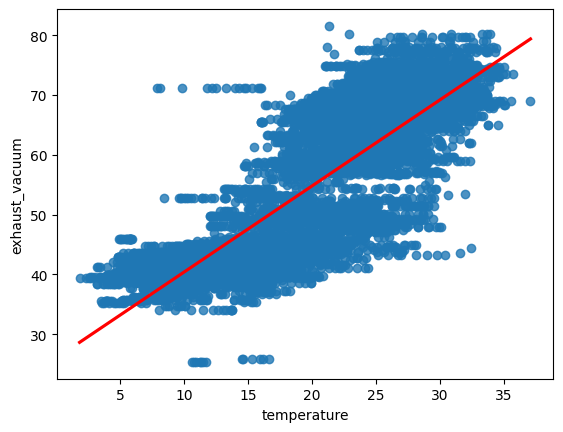

In [ ]:
# visualize the regression line
sns.regplot(x='temperature', y='exhaust_vacuum', data=data_outliersreplaced, line_kws={'color': 'red'})

In [ ]:
# Feature Engineering
# Pilynomial features for temperature for exhaust_vacuum to capture non-linear relation ship between them
'''data['temperature_squared'] = data['temperature'] ** 2
data['exhaust_vacuum_squared'] = data['exhaust_vacuum'] ** 2'''

"data['temperature_squared'] = data['temperature'] ** 2\ndata['exhaust_vacuum_squared'] = data['exhaust_vacuum'] ** 2"

In [ ]:
data_outliersreplaced_combined = data_outliersreplaced.copy()
data_outliersreplaced_combined["avg_of_temp_and_exhaust_vacuum"] = (data_outliersreplaced["temperature"]+data_outliersreplaced["exhaust_vacuum"])/2
data_outliersreplaced_combined.drop(["temperature", "exhaust_vacuum"], axis=1, inplace=True)
data_outliersreplaced_combined.head()

amb_pressure  r_humidity  energy_production  avg_of_temp_and_exhaust_vacuum
0       1017.01       60.10             481.30                          24.075
1       1019.72       94.67             465.36                          27.190
2       1024.42       81.69             465.48                          29.475
3       1017.89       79.08             467.05                          34.010
4       1023.78       75.00             463.58                          32.390

In [ ]:
# Move the new column to the first position using direct column assignment
data_outliersreplaced_combined = data_outliersreplaced_combined[['avg_of_temp_and_exhaust_vacuum'] + [col for col in data_outliersreplaced_combined.columns if col != 'avg_of_temp_and_exhaust_vacuum']]

# Check the new order of columns
data_outliersreplaced_combined.head()

avg_of_temp_and_exhaust_vacuum  amb_pressure  r_humidity  energy_production
0                          24.075       1017.01       60.10             481.30
1                          27.190       1019.72       94.67             465.36
2                          29.475       1024.42       81.69             465.48
3                          34.010       1017.89       79.08             467.05
4                          32.390       1023.78       75.00             463.58

In [ ]:
data_outliersreplaced.skew()

temperature         -0.136107
exhaust_vacuum       0.196819
amb_pressure         0.212180
r_humidity          -0.418039
energy_production    0.305791
dtype: float64

In [ ]:
data_outliersreplaced_combined.skew()

avg_of_temp_and_exhaust_vacuum    0.072121
amb_pressure                      0.212180
r_humidity                       -0.418039
energy_production                 0.305791
dtype: float64

In [ ]:
# Log transformation for skewed features - r_humidity
'''data['r_humidity_log'] = np.log1p(data['r_humidity'])'''

"data['r_humidity_log'] = np.log1p(data['r_humidity'])"

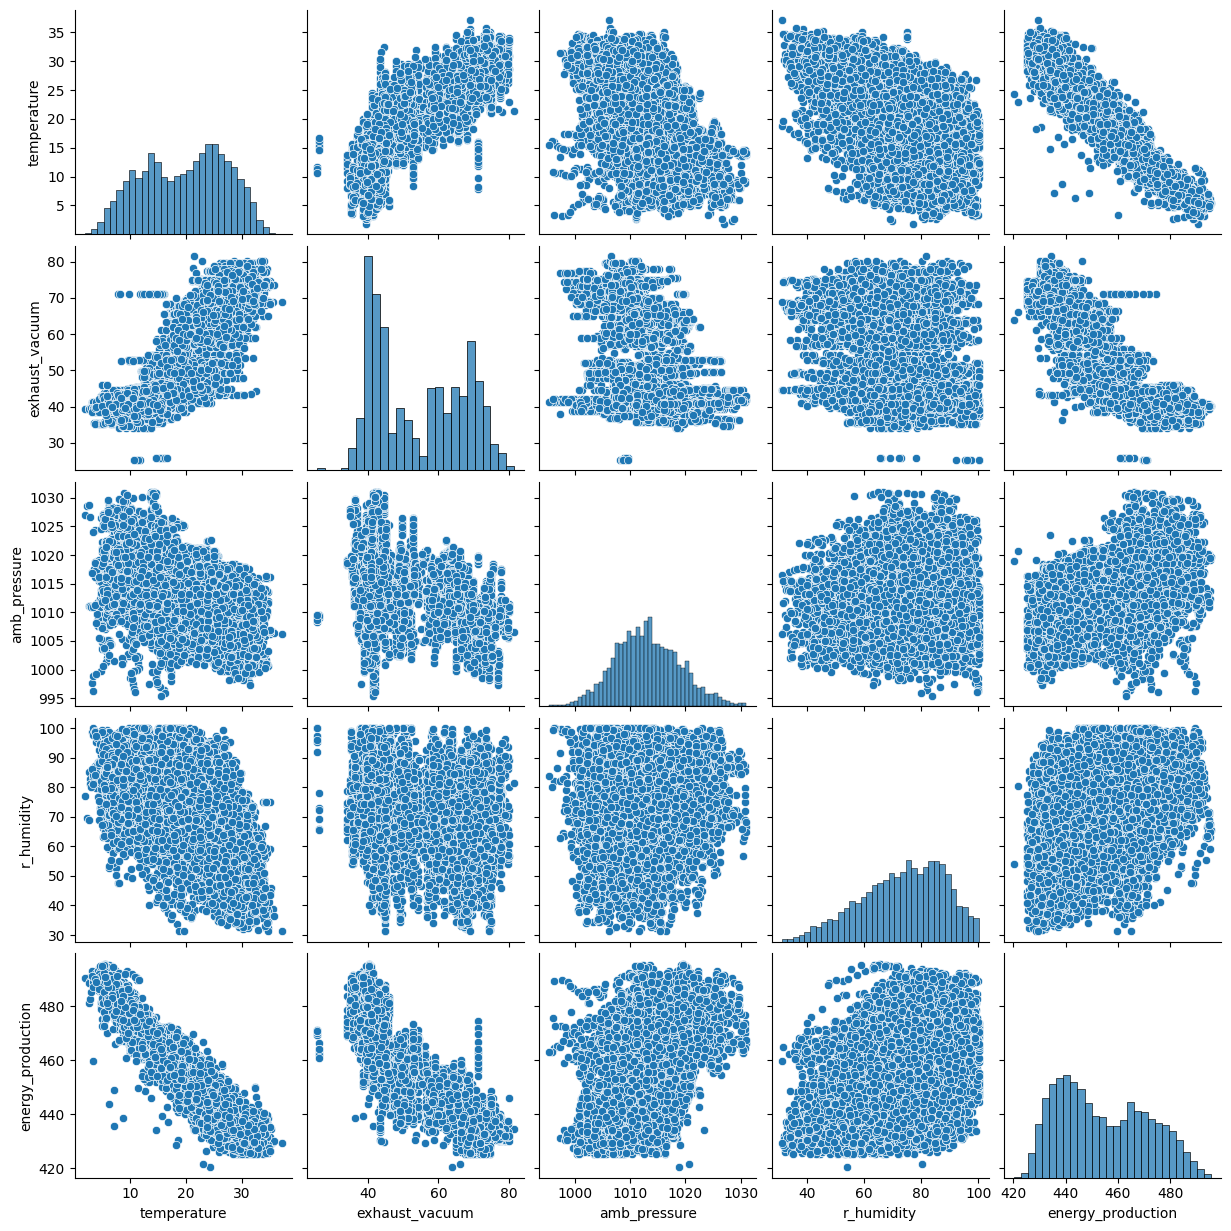

In [ ]:
sns.pairplot(data_outliersreplaced)

In [ ]:
data_outliersreplaced.shape

(9527, 5)

In [ ]:
data_outliersreplaced.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9527.000000     9527.000000   9527.000000  9527.000000   
mean     19.658225       54.293421   1013.172052    73.393371   
std       7.444397       12.686309      5.775939    14.520879   
min       1.810000       25.360000    995.450000    31.150000   
25%      13.530000       41.740000   1009.100000    63.440000   
50%      20.350000       52.080000   1012.930000    75.000000   
75%      25.710000       66.510000   1017.115000    84.850000   
max      37.110000       81.560000   1031.010000   100.160000   

       energy_production  
count         9527.00000  
mean           454.33591  
std             17.03908  
min            420.26000  
25%            439.75000  
50%            451.52000  
75%            468.36500  
max            495.76000

In [ ]:
data = data_outliersreplaced

In [ ]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# independent variable set
XVIF = data_outliersreplaced.drop('energy_production', axis=1)
# VIF data frame
VIF_data = pd.DataFrame()
VIF_data["feature"] = XVIF.columns
# calculating VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(XVIF.values, i) for i in range(XVIF.shape[1])]
VIF_data

feature        VIF
0     temperature  39.189342
1  exhaust_vacuum  74.993780
2    amb_pressure  67.276437
3      r_humidity  41.269182

In [ ]:
# drop feature with high multicollinearity
data_outliersreplaced_VIF = data_outliersreplaced.drop('exhaust_vacuum', axis=1)

# recalculate VIF
XVIF = data_outliersreplaced_VIF.drop('energy_production', axis=1)
VIF_data = pd.DataFrame()
VIF_data["feature"] = XVIF.columns
VIF_data["VIF"] = [variance_inflation_factor(XVIF.values, i) for i in range(XVIF.shape[1])]
VIF_data

feature        VIF
0   temperature  10.857662
1  amb_pressure  65.299578
2    r_humidity  36.904597

In [ ]:
# droping exhaust_vacuum
data_outliersreplaced_VIF_reduced = data_outliersreplaced_VIF.drop('amb_pressure', axis=1)

# recalculate VIF
XVIF = data_outliersreplaced_VIF_reduced.drop('energy_production', axis=1)
VIF_data = pd.DataFrame()
VIF_data["feature"] = XVIF.columns
VIF_data["VIF"] = [variance_inflation_factor(XVIF.values, i) for i in range(XVIF.shape[1])]
VIF_data

feature       VIF
0  temperature  4.438039
1   r_humidity  4.438039

In [ ]:
data_outliersreplaced_VIF_reduced.head()

temperature  r_humidity  energy_production
0         9.59       60.10             481.30
1        12.04       94.67             465.36
2        13.87       81.69             465.48
3        13.72       79.08             467.05
4        15.14       75.00             463.58

# Model Building

# Linear Regression

On data

In [ ]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X = EPdata.drop('energy_production', axis=1)
y = EPdata['energy_production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Model building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

454.26337226085815

In [ ]:
model.coef_

array([-14.73203844,  -2.96611277,   0.33960139,  -2.31615102])

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# to check accuracy
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print('R2_train accuracy:', R2_train)
print('R2_test accuracy:', R2_test)

R2_train accuracy: 0.9284318078515336
R2_test accuracy: 0.9280979147496405


In [ ]:
# evaluating the model using various evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 20.937811623977915
MAE: 3.6383068501863085
R2: 0.9280979147496405


In [ ]:
X_test.shape

(1906, 4)

In [ ]:
y_test.shape

(1906,)

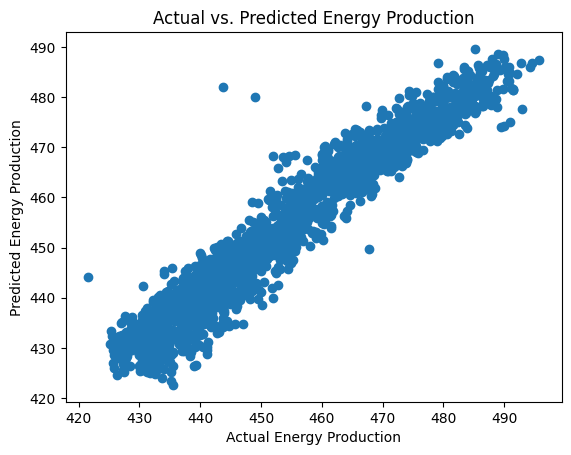

In [ ]:
# visualization
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Energy Production')
plt.ylabel('Predicted Energy Production')
plt.title('Actual vs. Predicted Energy Production')
plt.show()

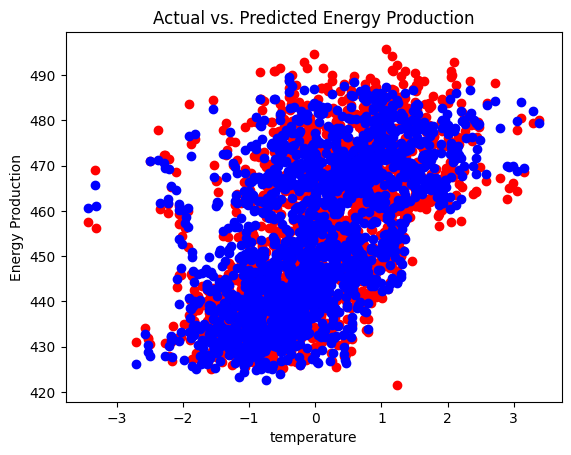

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
plt.scatter(X_test_df.iloc[:,2], y_test, color='red', label = 'Actual')
plt.scatter(X_test_df.iloc[:,2], y_pred_test, color='blue', label = 'Predicted')
plt.xlabel('temperature')
plt.ylabel('Energy Production')
plt.title('Actual vs. Predicted Energy Production')
plt.show()

on data_outlierstrimmed

In [ ]:
# splitting data into train and test
X = data_outlierstrimmed.drop('energy_production', axis=1)
y = data_outlierstrimmed['energy_production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# to check accuracy
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print('R2_train accuracy:', R2_train)
print('R2_test accuracy:', R2_test)

R2_train accuracy: 0.9285533323152998
R2_test accuracy: 0.9249519258510632


In [ ]:
# evaluating the model using various evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 21.888191911490864
MAE: 3.736122077372203
R2: 0.9249519258510632


on data_outliersreplaced

In [ ]:
# splitting data into train and test
X = data.drop('energy_production', axis=1)
y = data['energy_production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# to check accuracy
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print('R2_train accuracy:', R2_train)
print('R2_test accuracy:', R2_test)

R2_train accuracy: 0.9290888730414123
R2_test accuracy: 0.9200254464849325


In [ ]:
# evaluating the model using various evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('R2_train:', R2_train)
print('R2_test:', R2_test)
print('MSE:', mse)
print('MAE:', mae)

R2_train: 0.9290888730414123
R2_test: 0.9200254464849325
MSE: 22.708056083233043
MAE: 3.7225599621444982


VIF

In [ ]:
# splitting data into train and test
X = data_outliersreplaced_VIF_reduced.drop('energy_production', axis=1)
y = data_outliersreplaced_VIF_reduced['energy_production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# to check accuracy
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print('R2_train accuracy:', R2_train)
print('R2_test accuracy:', R2_test)

R2_train accuracy: 0.9194008562699814
R2_test accuracy: 0.9223268740098686


FE

In [ ]:
# splitting data into train and test
X = data_outliersreplaced_combined.drop('energy_production', axis=1)
y = data_outliersreplaced_combined['energy_production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# to check accuracy
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print('Linear Regression accuracy:', R2_test)
print('Linear Regression_train accuracy:', R2_train)
print('MSE Linear Regression:', mse)
print('MAE Linear Regression:', mae)

Linear Regression accuracy: 0.8830582834482814
Linear Regression_train accuracy: 0.8786539919666281
MSE Linear Regression: 34.16828770609636
MAE Linear Regression: 4.6042126997823924


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
L_model = Lasso(alpha=0.1)
L_model.fit(X_train, y_train)

y_pred_L = L_model.predict(X_test)
y_pred_train_L = L_model.predict(X_train)

r2_train_L = r2_score(y_train, y_pred_train_L)
r2_L = r2_score(y_test, y_pred_L)
mse_L = mean_squared_error(y_test, y_pred_L)
mae_L = mean_absolute_error(y_test, y_pred_L)

print('Lasso - accuracy:', r2_L)
print('Lasso - train_accuracy:', r2_train_L)
print('Lasso - MSE:', mse_L)
print('Lasso - MAE:', mae_L)

Lasso - accuracy: 0.8829319110001651
Lasso - train_accuracy: 0.8785885799046425
Lasso - MSE: 34.20521148567378
Lasso - MAE: 4.606467045285962


In [ ]:
# hyperparameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}

# initialize randomized search cv
grid_search = GridSearchCV(estimator=L_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'alpha': 0.001}
Best MSE: 35.161479357007764


In [ ]:
# Model building with best alpha value
L_model = Lasso(alpha=0.001, random_state=42)
L_model.fit(X_train, y_train)

# Predicting on test data
y_pred_L = L_model.predict(X_test)
y_pred_train_L = L_model.predict(X_train)

# Evaluating the model
r2_train_L = r2_score(y_train, y_pred_train_L)
r2_L = r2_score(y_test, y_pred_L)
mse_L = mean_squared_error(y_test, y_pred_L)
mae_L = mean_absolute_error(y_test, y_pred_L)

print('Lasso - accuracy:', r2_L)
print('Lasso - train_accuracy:', r2_train_L)
print('Lasso - MSE:', mse_L)
print('Lasso - MAE:', mae_L)

Lasso - accuracy: 0.8830576746377007
Lasso - train_accuracy: 0.8786539857930487
Lasso - MSE: 34.16846558970961
Lasso - MAE: 4.604220912018547


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

R_model = Ridge(alpha=0.1)
R_model.fit(X_train, y_train)

y_pred_R = R_model.predict(X_test)
y_pred_train_R = R_model.predict(X_train)

r2_train_R = r2_score(y_train, y_pred_train_R)
r2_R = r2_score(y_test, y_pred_R)
mse_R = mean_squared_error(y_test, y_pred_R)
mae_R = mean_absolute_error(y_test, y_pred_R)

print('Ridge - accuracy:', r2_R)
print('Ridge - train_accuracy:', r2_train_R)
print('Ridge - MSE:', mse_R)
print('Ridge - MAE:', mae_R)

Ridge - accuracy: 0.8830582981343853
Ridge - train_accuracy: 0.8786539917283499
Ridge - MSE: 34.16828341507826
Ridge - MAE: 4.604211896739542


In [ ]:
# Hyper parameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}

# initialize randomized search cv
grid_search = GridSearchCV(estimator=R_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'alpha': 0.001}
Best MSE: 35.16147954154915


In [ ]:
# model building with best alpha value
R_model = Ridge(alpha=0.001, random_state=42)
R_model.fit(X_train, y_train)

y_pred_R = R_model.predict(X_test)
y_pred_train_R = R_model.predict(X_train)

# model evaluation
r2_train_R = r2_score(y_train, y_pred_train_R)
r2_R = r2_score(y_test, y_pred_R)
mse_R = mean_squared_error(y_test, y_pred_R)
mae_R = mean_absolute_error(y_test, y_pred_R)

print('Ridge - accuracy:', r2_R)
print('Ridge - train_accuracy:', r2_train_R)
print('Ridge - MSE:', mse_R)
print('Ridge - MAE:', mae_R)

Ridge - accuracy: 0.8830582835974669
Ridge - train_accuracy: 0.8786539919666042
Ridge - MSE: 34.168287662507026
Ridge - MAE: 4.604212691751488


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_dt = r2_score(y_test, y_pred_test_dt)
mse_dt = mean_squared_error(y_test, y_pred_test_dt)
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
print('Decision Tree - accuracy:', r2_dt)
print('Decision Tree - train_accuracy:', r2_train_dt)
print('Decision Tree - MSE:', mse_dt)
print('Decision Tree - MAE:', mae_dt)

Decision Tree - accuracy: 0.8741624877777237
Decision Tree - train_accuracy: 1.0
Decision Tree - MSE: 36.7674808324589
Decision Tree - MAE: 4.361339629240994


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning

# Define the parameter grid
param_grid = {
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best MSE: 31.32185221900062


In [ ]:
# Creating the model using best parameters
dt_model = DecisionTreeRegressor(max_depth = 10,max_features='sqrt', min_samples_split=2, min_samples_leaf=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_test_dt)
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_dt = r2_score(y_test, y_pred_test_dt)

print('Decision Tree - accuracy:', r2_dt)
print('Decision Tree - train_accuracy:', r2_train_dt)
print('Decision Tree - MSE:', mse_dt)
print('Decision Tree - MAE:', mae_dt)

Decision Tree - accuracy: 0.8956509335569937
Decision Tree - train_accuracy: 0.9276358129168532
Decision Tree - MSE: 30.488939526643257
Decision Tree - MAE: 4.181135307776189


# Random Forest

In [ ]:
# Importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# creating the model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_rf = r2_score(y_test, y_pred_test_rf)
mse_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
print('Random Forest - accuracy:', r2_rf)
print('Random Forest - train_accuracy:', r2_train_rf)
print('Random Forest - MSE:', mse_rf)
print('Random Forest - MAE:', mae_rf)

Random Forest - accuracy: 0.9321971674751682
Random Forest - train_accuracy: 0.9901623693510853
Random Forest - MSE: 19.81078059489688
Random Forest - MAE: 3.2980583071003937


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# grid search
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Randomized search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, random_state=42)

# fit model
# grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best MSE: 20.803408190519193


In [ ]:
# model building using best parameters
rf_model = RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred_rf = rf_model.predict(X_test)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_rf = r2_score(y_test, y_pred_test_rf)
mse_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
print('Random Forest - accuracy:', r2_rf)
print('Random Forest - train_accuracy:', r2_train_rf)
print('Random Forest - MSE:', mse_rf)
print('Random Forest - MAE:', mae_rf)

Random Forest - accuracy: 0.931172253758016
Random Forest - train_accuracy: 0.9802133484355627
Random Forest - MSE: 20.110242136887262
Random Forest - MAE: 3.4050329981909377


# SVM

In [ ]:
# Importing Support Vector Regressor
from sklearn.svm import SVR

In [ ]:
# Creating the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predicting on test data
y_pred_svr = svr_model.predict(X_test)
y_pred_train_svr = svr_model.predict(X_train)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)

print('Support Vector Regressor - Accuracy:', r2_svr)
print('Support Vector Regressor - Train_Accuracy:', r2_train_svr)
print('Support Vector Regressor - MSE:', mse_svr)
print('Support Vector Regressor - MAE:', mae_svr)

Support Vector Regressor - Accuracy: 0.9118388031623168
Support Vector Regressor - Train_Accuracy: 0.9107574368466049
Support Vector Regressor - MSE: 25.759132214649227
Support Vector Regressor - MAE: 3.8926376132731626


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 1]
    #'epsilon': [0.01, 0.1, 2]
}

# random search
random_search = GridSearchCV(estimator=svr_model, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best MSE: 23.600713008015482


In [ ]:
# building model using best parameters
# Creating the model
svr_model = SVR(C=10, gamma=0.01, kernel='rbf')
svr_model.fit(X_train, y_train)

# Predicting on test data
y_pred_svr = svr_model.predict(X_test)
y_pred_train_svr = svr_model.predict(X_train)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)

print('Support Vector Regressor - Accuracy:', r2_svr)
print('Support Vector Regressor - Train_Accuracy:', r2_train_svr)
print('Support Vector Regressor - MSE:', mse_svr)
print('Support Vector Regressor - MAE:', mae_svr)

Support Vector Regressor - Accuracy: 0.9022903971259724
Support Vector Regressor - Train_Accuracy: 0.8994797366376814
Support Vector Regressor - MSE: 28.54900647171262
Support Vector Regressor - MAE: 4.190742363398383


# KNN

In [ ]:
# Importing the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Creating the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predicting on test data
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)

# Evaluating the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

print('K-Nearest Neighbour Regressor - Accuracy:', r2_knn)
print('K-Nearest Neighbour Regressor - Train_Accuracy:', r2_train_knn)
print('K-Nearest Neighbour Regressor - MSE:', mse_knn)
print('K-Nearest Neighbour Regressor - MAE:', mae_knn)

K-Nearest Neighbour Regressor - Accuracy: 0.9220616241062561
K-Nearest Neighbour Regressor - Train_Accuracy: 0.9483099539709302
K-Nearest Neighbour Regressor - MSE: 22.772205927946832
K-Nearest Neighbour Regressor - MAE: 3.585059811122771


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyper parameter tuning
params_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 10, 11, 14, 16, 18, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# initialize grid_search
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}
Best MSE: 21.885951717332663


In [ ]:
# model building with best parameters
knn_model = KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')
knn_model.fit(X_train, y_train)

# Predicting on test data
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)

# Evaluating the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

print('K-Nearest Neighbour Regressor - Accuracy:', r2_knn)
print('K-Nearest Neighbour Regressor - Train_Accuracy:', r2_train_knn)
print('K-Nearest Neighbour Regressor - MSE:', mse_knn)
print('K-Nearest Neighbour Regressor - MAE:', mae_knn)

K-Nearest Neighbour Regressor - Accuracy: 0.9273783843664445
K-Nearest Neighbour Regressor - Train_Accuracy: 1.0
K-Nearest Neighbour Regressor - MSE: 21.218743232244798
K-Nearest Neighbour Regressor - MAE: 3.4651275147887413


# Gradient Boosting Regressor

In [ ]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Creating the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_gb = gb_model.predict(X_test)
y_pred_train_gb = gb_model.predict(X_train)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

print('Gradient Boosting - accuracy:', r2_gb)
print('Gradient Boosting - train_accuracy:', r2_train_gb)
print('Gradient Boosting - MSE:', mse_gb)
print('Gradient Boosting - MAE:', mae_gb)

Gradient Boosting - accuracy: 0.9238647215790176
Gradient Boosting - train_accuracy: 0.9291274085687844
Gradient Boosting - MSE: 22.245372946286253
Gradient Boosting - MAE: 3.6801174819153486


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyperparameter tuning
params_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.7, 0.8, 0.9]
    #'loss': ['squared_error', 'absolute_error', 'huber'],
    #'alpha': [0.75, 0.8, 0.85],
    #'tol': [0.0001, 0.001, 0.01]
}

Random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
Random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", Random_search.best_params_)
print("Best MSE:", -Random_search.best_score_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.2}
Best MSE: 23.0169695836786


In [ ]:
# model building with best parameters
gb_model = GradientBoostingRegressor(subsample = 0.9, n_estimators = 300, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 3, learning_rate = 0.2, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_gb = gb_model.predict(X_test)
y_pred_train_gb = gb_model.predict(X_train)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

print('Gradient Boosting - accuracy:', r2_gb)
print('Gradient Boosting - train_accuracy:', r2_train_gb)
print('Gradient Boosting - MSE:', mse_gb)
print('Gradient Boosting - MAE:', mae_gb)

Gradient Boosting - accuracy: 0.9218267066284433
Gradient Boosting - train_accuracy: 0.943608254417974
Gradient Boosting - MSE: 22.84084463281439
Gradient Boosting - MAE: 3.704783579119526


# LGBM

In [ ]:
# import LGBoost Regressor
from lightgbm import LGBMRegressor

In [ ]:
# creating the model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_lgb = lgb_model.predict(X_test)
y_pred_train_lgb = lgb_model.predict(X_train)

# evaluating the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

print('LGBM Regressor - accuracy:', r2_lgb)
print('LGBM Regressor - train_accuracy:', r2_train_lgb)
print('LGBM Regressor - MSE:', mse_lgb)
print('LGBM Regressor - MAE:', mae_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 6668, number of used features: 3
[LightGBM] [Info] Start training from score 454.346158
LGBM Regressor - accuracy: 0.9275234410169849
LGBM Regressor - train_accuracy: 0.9465379177057955
LGBM Regressor - MSE: 21.17636026134704
LGBM Regressor - MAE: 3.511918036068099


In [ ]:
# hyper parameter tuning
prams_grid ={
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3,5,7],
    'min_child_samples': [20, 40, 60],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=prams_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# best params and best score
print("Best Parameters:", Random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 6668, number of used features: 3
[LightGBM] [Info] Start training from score 454.346158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
# model building using best parameters
lgb_model = LGBMRegressor(subsample=0.9, n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=3, learning_rate=0.2, random_state=42)
lgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_lgb = lgb_model.predict(X_test)
y_pred_train_lgb = lgb_model.predict(X_train)

# Evaluation of model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

print('LGBM Regressor - accuracy:', r2_lgb)
print('LGBM Regressor - train_accuracy:', r2_train_lgb)
print('LGBM Regressor - MSE:', mse_lgb)
print('LGBM Regressor - MAE:', mae_lgb)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 6668, number of used features: 3
[LightGBM] [Info] Start training from score 454.346158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# XGBM

In [ ]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# Creating the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print('XGBoost Regressor - accuracy:', r2_xgb)
print('XGBoost Regressor - train_accuracy:', r2_train_xgb)
print('XGBoost Regressor - MSE:', mse_xgb)
print('XGBoost Regressor - MAE:', mae_xgb)

XGBoost Regressor - accuracy: 0.9245764456156319
XGBoost Regressor - train_accuracy: 0.973789090455951
XGBoost Regressor - MSE: 22.03741985334849
XGBoost Regressor - MAE: 3.558317643946474


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1,2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best MSE: 21.469269036514586


In [ ]:
# model building with best parameters
xgb_model = XGBRegressor(subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=1.0, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print('XGBoost Regressor - accuracy:', r2)
print('XGBoost Regressor - train_accuracy:', r2_train_xgb)
print('XGBoost Regressor - MSE:', mse_xgb)
print('XGBoost Regressor - MAE:', mae_xgb)

XGBoost Regressor - accuracy: 0.9200254464849325
XGBoost Regressor - train_accuracy: 0.9542725783606126
XGBoost Regressor - MSE: 21.117251556356646
XGBoost Regressor - MAE: 3.5063187530400164


In [ ]:
r2_score_comparison = pd.DataFrame({'Model':['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Gradient Boosting', 'LGBoost', 'XGBoost'],
                                    'R2 Score': [r2, r2_L, r2_R, r2_dt, r2_rf, r2_svr, r2_knn, r2_gb, r2_lgb, r2_xgb],
                                    'MSE Value': [mse, mse_L, mse_R, mse_dt, mse_rf, mse_svr, mse_knn, mse_gb, mse_lgb, mse_xgb]})
r2_score_comparison

Model  R2 Score  MSE Value
0  Linear Regression  0.920025  34.168288
1   Lasso Regression  0.883058  34.168466
2   Ridge Regression  0.883058  34.168288
3      Decision Tree  0.874162  36.767481
4      Random Forest  0.931172  20.110242
5                SVR  0.902290  28.549006
6                KNN  0.927378  21.218743
7  Gradient Boosting  0.921827  22.840845
8            LGBoost  0.926250  21.548544
9            XGBoost  0.927726  21.117252

In [ ]:
from sklearn.model_selection import KFold
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Define number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Perform cross-validation for each model
for model_name, model in models.items():
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # Initialize accuracies list here

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metric (e.g., MSE)
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)

        #print accuracy
        accuracy=r2_score(y_test,y_pred)
        accuracies.append(accuracy)

    # Print average score across folds
    avg_score = sum(scores) / len(scores)
    print(f"{model_name}: Average MSE = {avg_score}")

    #print average accuracy across folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"{model_name}: Average Accuracy = {avg_accuracy}")

Linear Regression: Average MSE = 34.873522148853155
Linear Regression: Average Accuracy = 0.8798336196360218
Lasso: Average MSE = 34.87380158203762
Lasso: Average Accuracy = 0.8798324973303842
Ridge: Average MSE = 34.873522150266396
Ridge: Average Accuracy = 0.8798336196393773
Decision Tree: Average MSE = 35.67879784631485
Decision Tree: Average Accuracy = 0.8770827716920013
Random Forest: Average MSE = 19.292158175185634
Random Forest: Average Accuracy = 0.9335012458019174
Support Vector Machine: Average MSE = 216.61818871350079
Support Vector Machine: Average Accuracy = 0.25367882240508555
K-Nearest Neighbors: Average MSE = 23.826358945800003
K-Nearest Neighbors: Average Accuracy = 0.9178850543108938
XGBoost: Average MSE = 21.153581077213204
XGBoost: Average Accuracy = 0.9270936121537019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[Lig

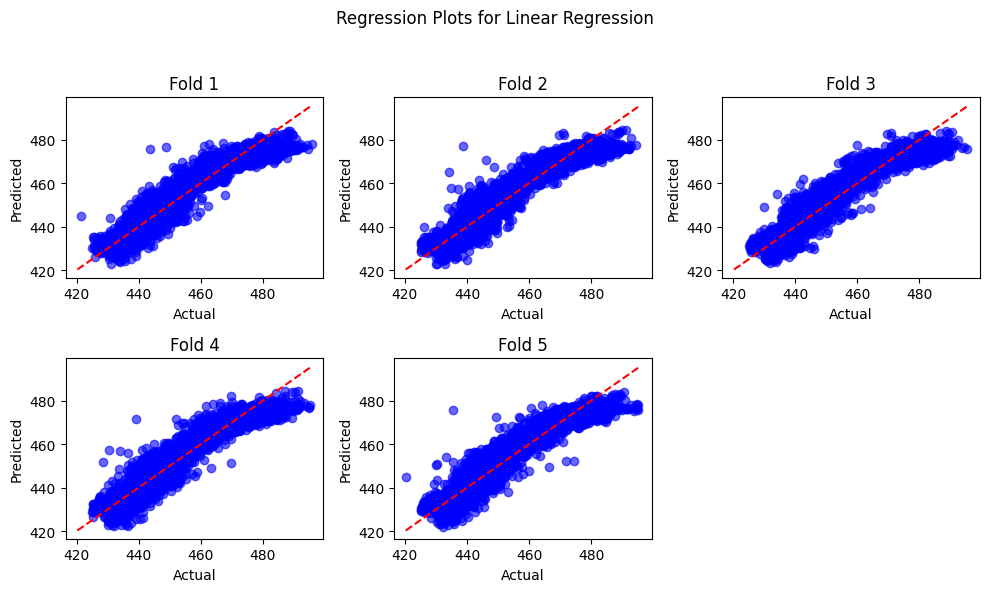

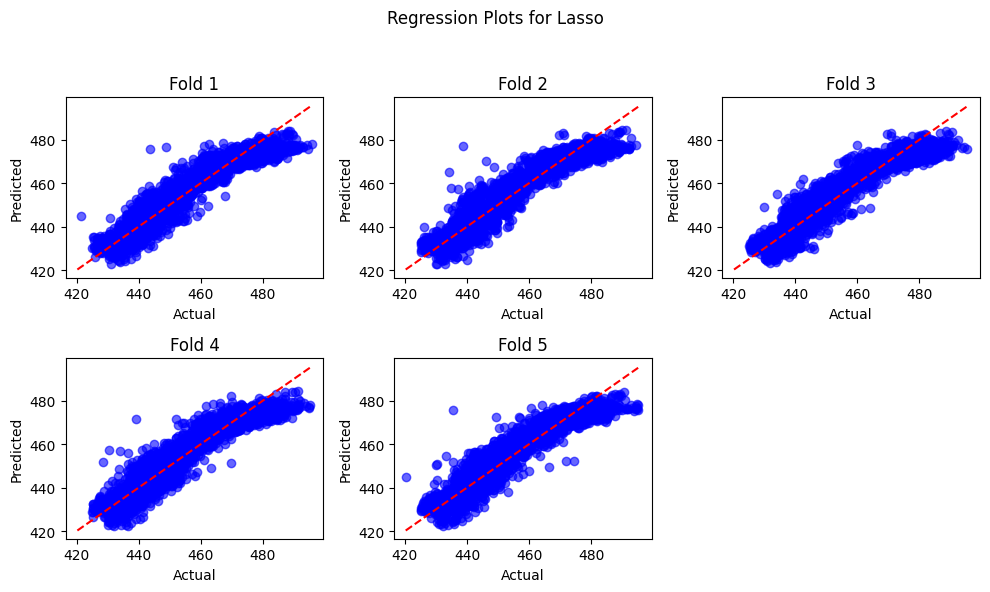

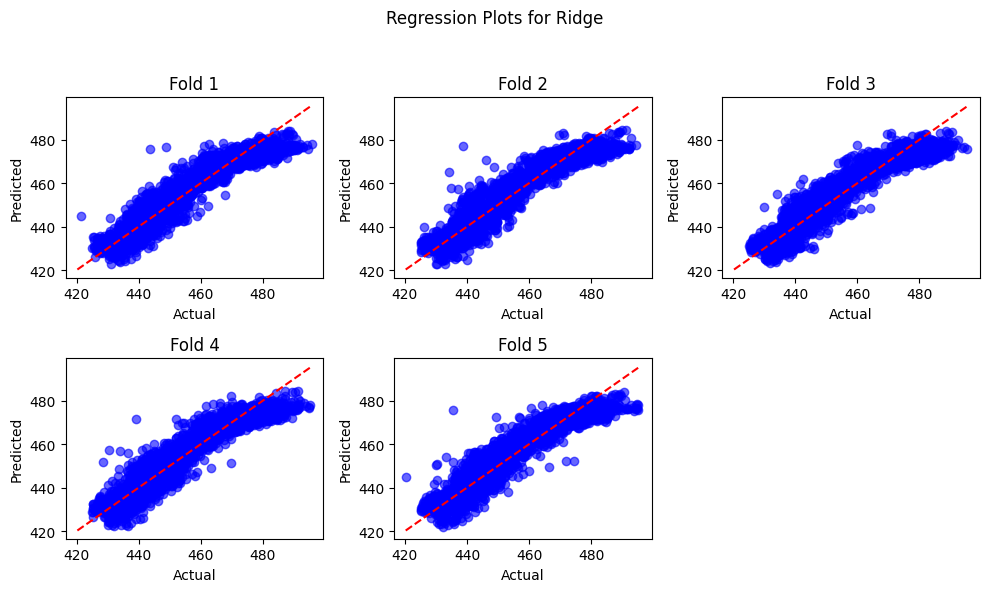

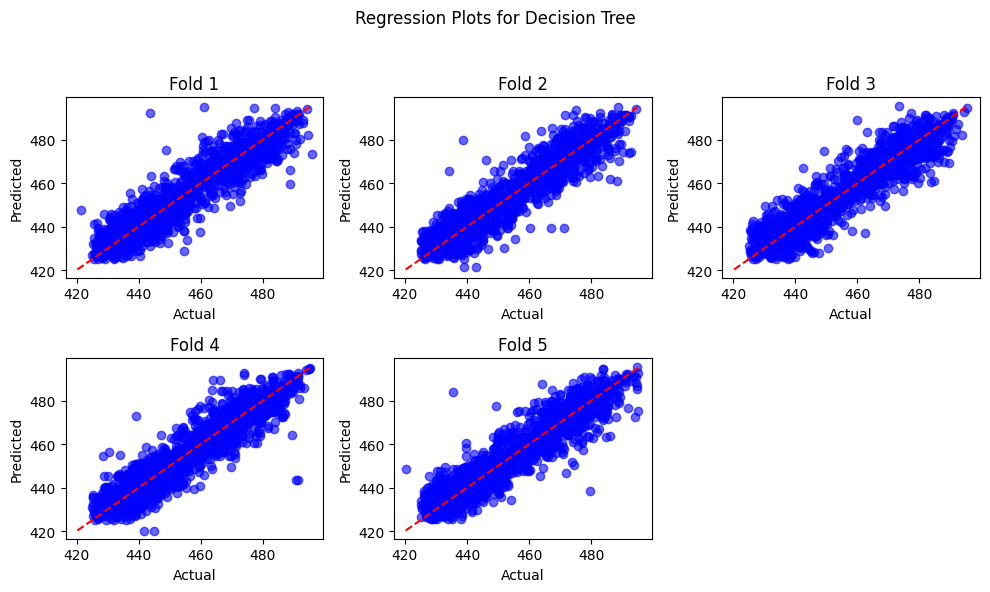

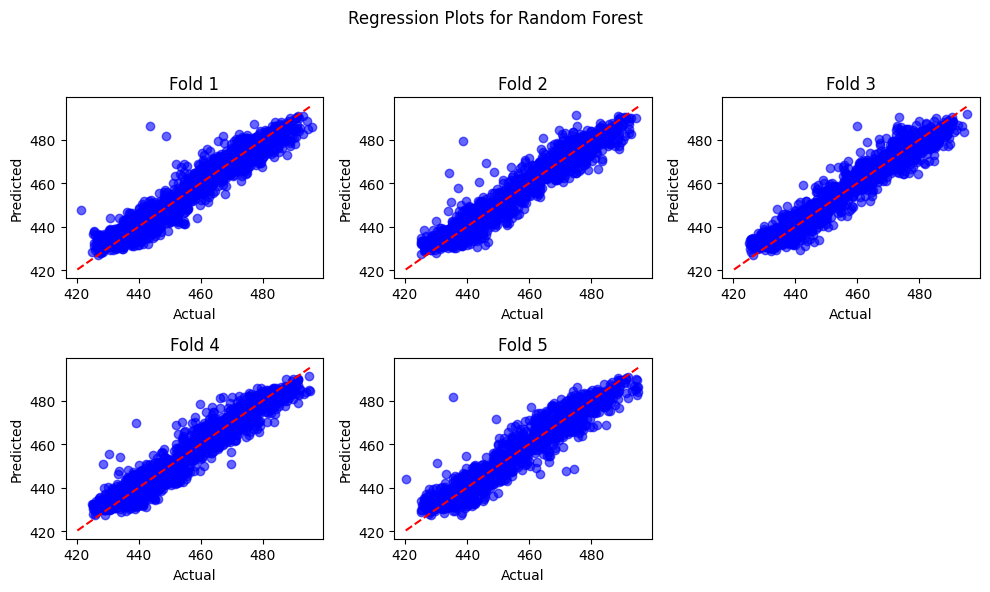

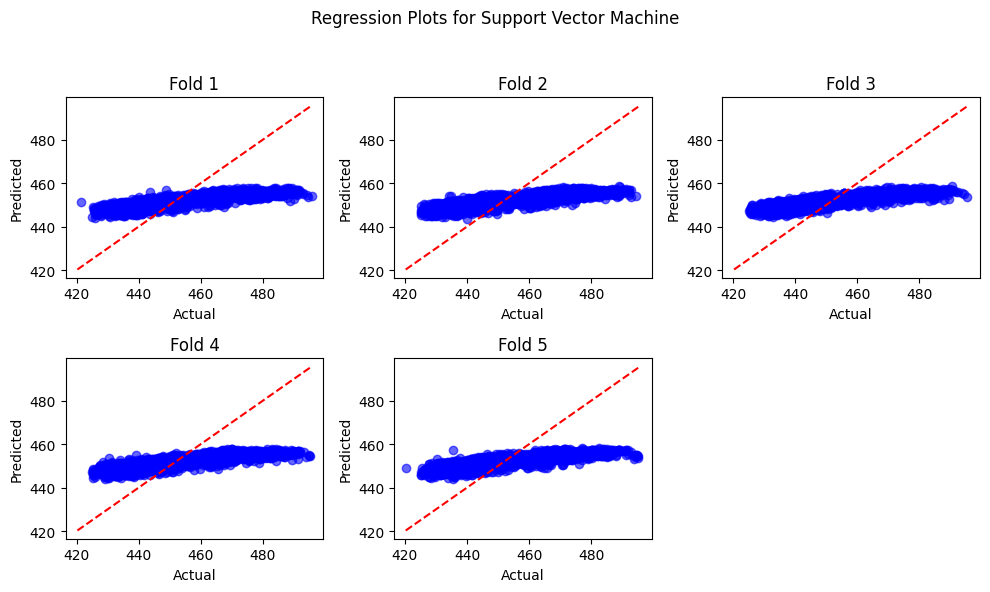

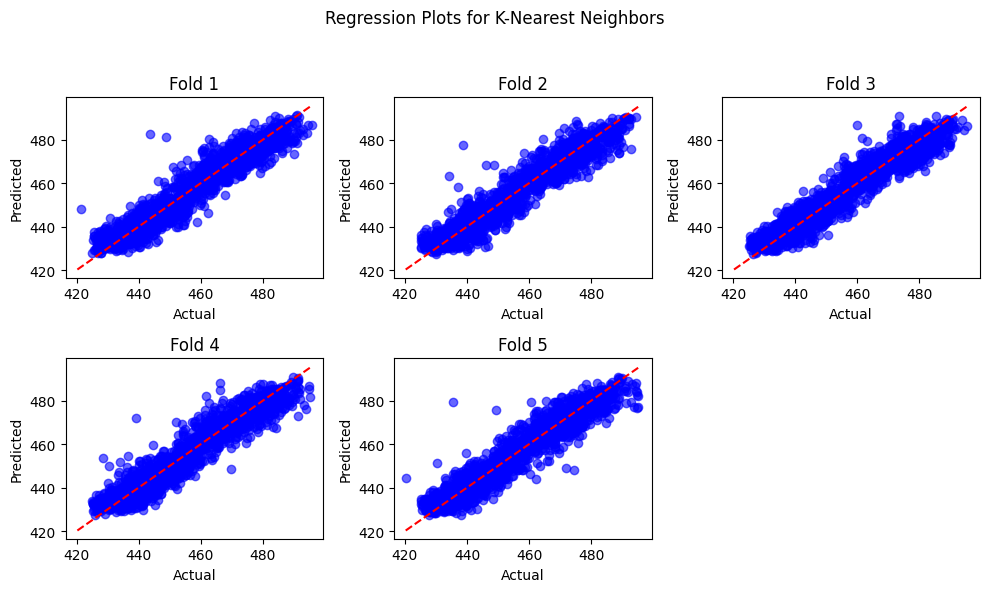

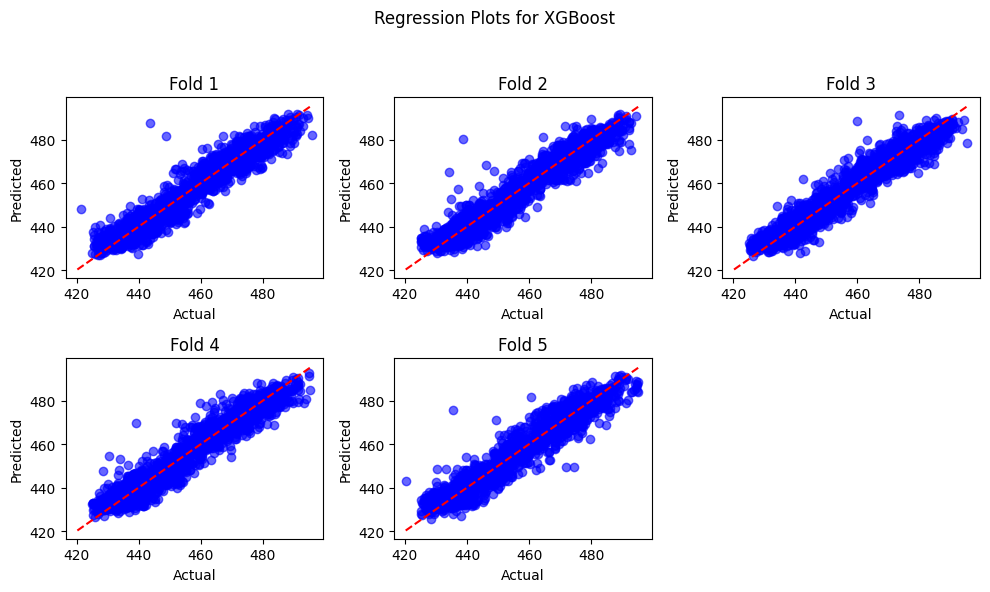

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 3
[LightGBM] [Info] Start training from score 454.263372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 3
[LightGBM] [Info] Start training from score 454.368412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7622, number of used features: 3
[LightGBM] [Info] Start training

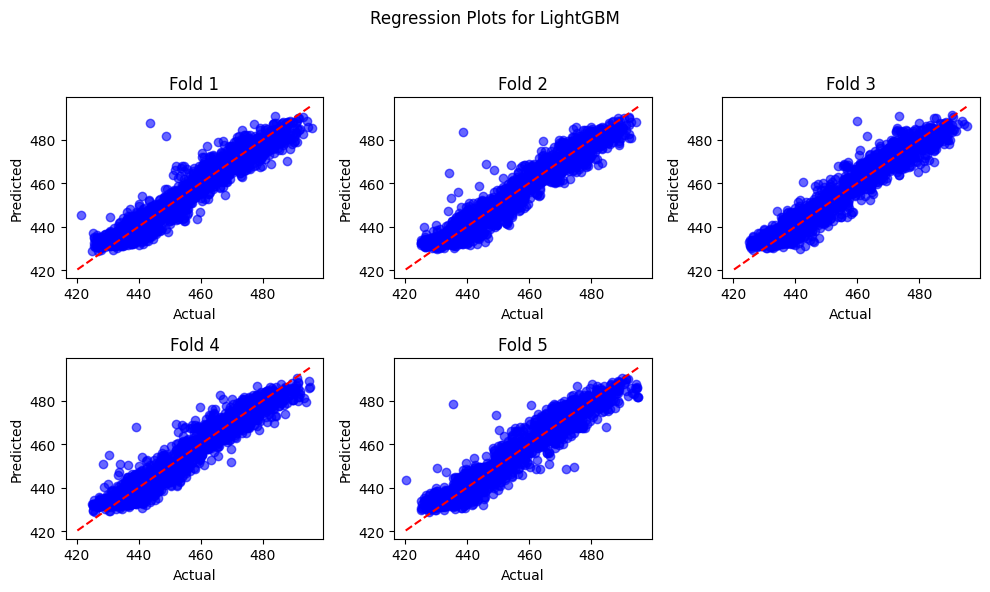

In [ ]:
for model_name, model in models.items():
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    plt.figure(figsize=(10, 6))  # Create a new figure for each model
    plt.suptitle(f"Regression Plots for {model_name}")

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Plot the regression for this fold
        plt.subplot(2, 3, fold)  # Adjust subplot layout (2 rows, 3 columns)
        plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal fit line
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f"Fold {fold}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
    plt.show()  # Display the plots